In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('/content/placementdata (1).csv')
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


No null values found


Some of the independent variables are :
CGPA, Internships, Projects, Workshops/Certifications, AptitudeTestScore, SoftSkillsRating, ExtracurricularActivities, PlacementTraining, SSC_Marks, HSC_Marks
depenent variable is :PlacementStatus(yes or no)

In [4]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [5]:
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [6]:
#checking duplicate values
df.duplicated().sum()

np.int64(0)

In [7]:
#droping duplicates
df.drop_duplicates(inplace=True)

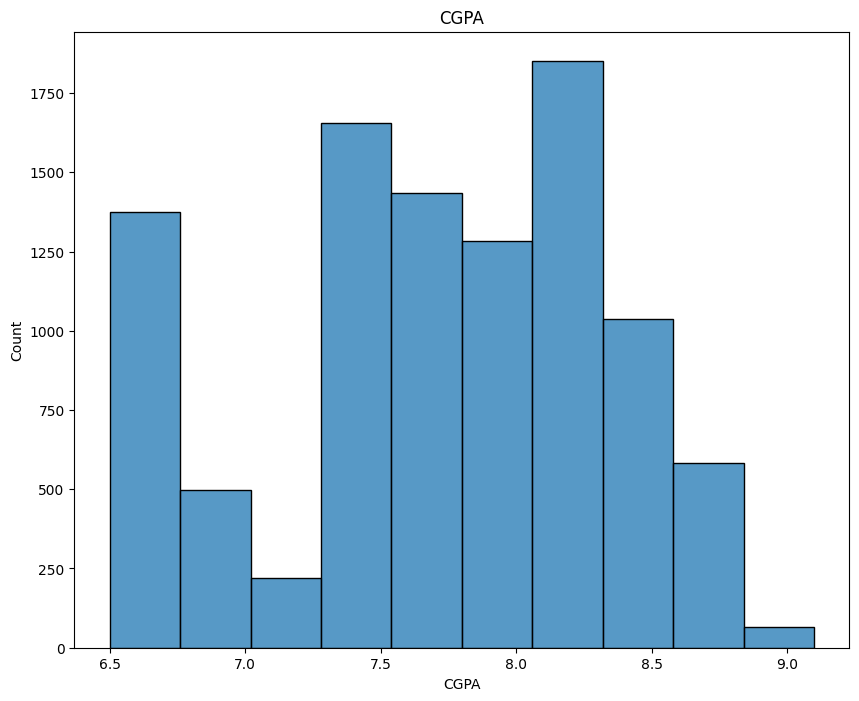

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(x='CGPA',data=df,bins=10)
plt.title("CGPA")
plt.show()

This histrogram shows that maximum students are obtained 8.0 to 8.2 CGPA

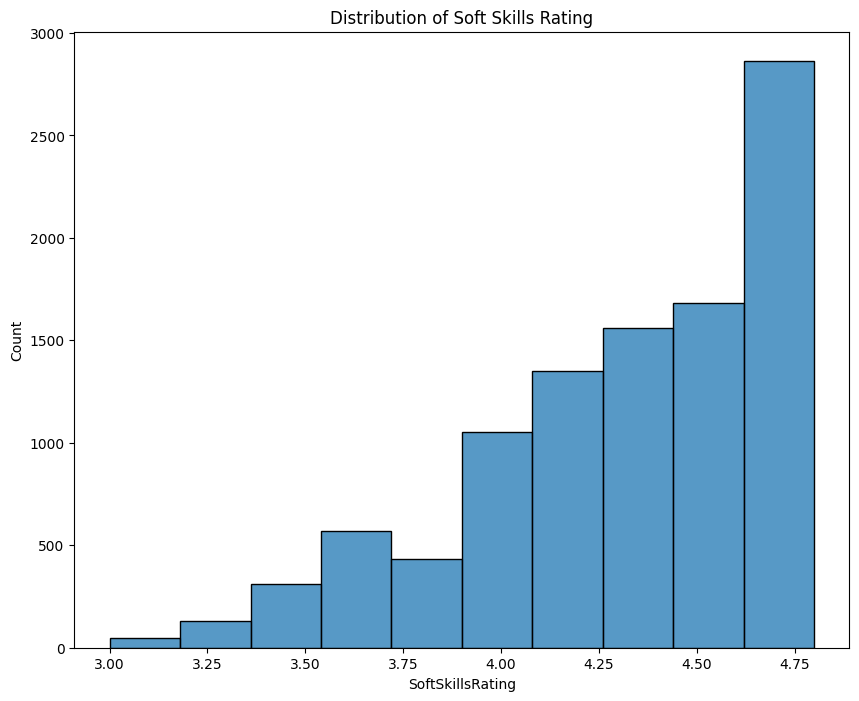

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(x='SoftSkillsRating',data=df,bins=10)
plt.title("Distribution of Soft Skills Rating")
plt.show()

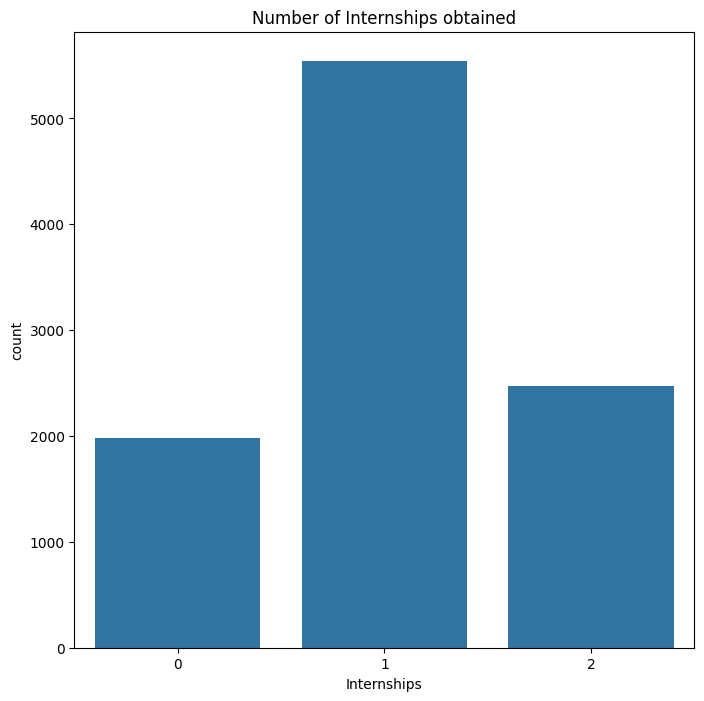

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x='Internships',data=df)
plt.title("Number of Internships obtained")
plt.show()

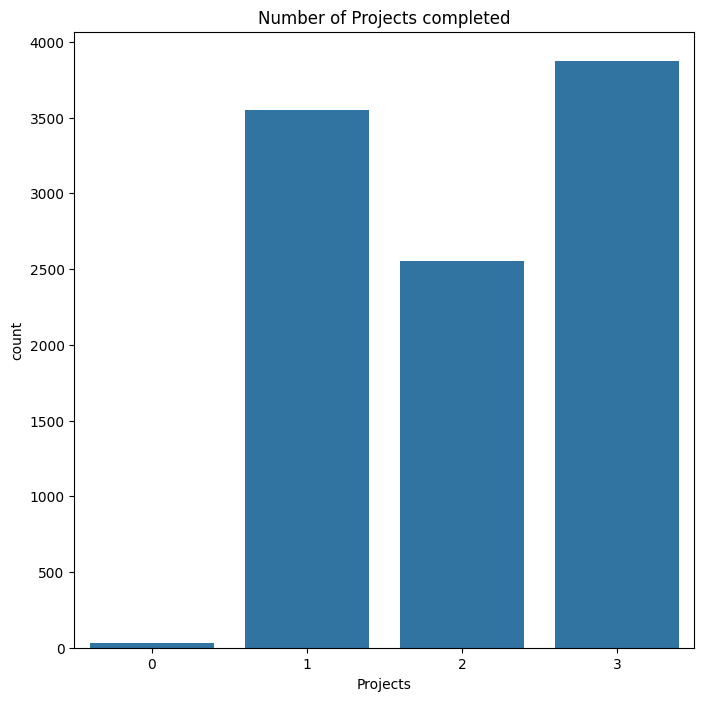

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(x='Projects',data=df)
plt.title("Number of Projects completed")
plt.show()


maximum no of projects done are 3

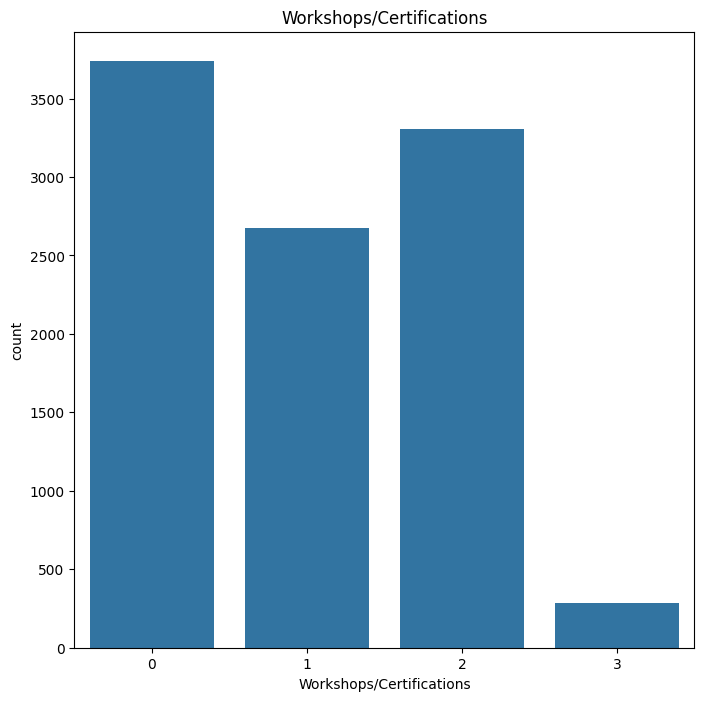

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x='Workshops/Certifications',data=df)
plt.title("Workshops/Certifications")
plt.show()

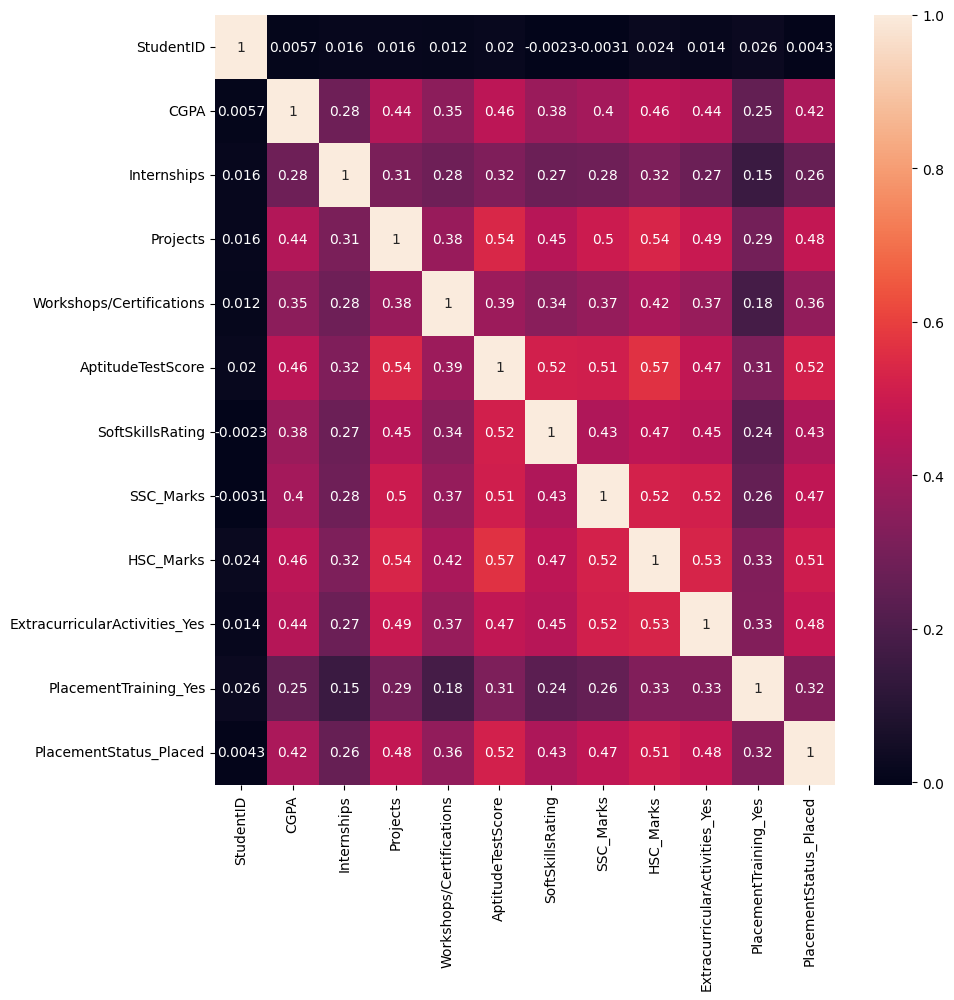

In [13]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], drop_first=True)

plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr(),annot=True)
plt.show()

CGPA: You will likely see a positive correlation between CGPA and Placement Status. Higher CGPA generally correlates with a higher chance of placement.

AptitudeTestScore: This should also show a positive correlation with Placement Status. Good test scores are often important for placement.
SoftSkillsRating: This is another factor that often positively correlates with placement.

Internships, Projects, Workshops/Certifications, ExtracurricularActivities_Yes, PlacementTraining_Yes: These activities are generally expected to have a positive correlation with Placement Status as they enhance a student's profile.

In [14]:
# Encode categorical features
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes': 1, 'No': 0})
df['PlacementStatus'] = df['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})

In [15]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [16]:
numeric_cols = ['CGPA','Internships','Projects','Workshops/Certifications',
                'AptitudeTestScore','SoftSkillsRating','SSC_Marks','HSC_Marks']
categorical_cols = ['ExtracurricularActivities','PlacementTraining']


In [17]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [18]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,-0.309343,-0.073889,-1.182822,-0.014598,-1.770910,0.184742,0,0,-0.782306,0.504368,0
1,2,1.877818,-1.575689,1.121526,1.091319,1.292970,-0.787072,1,1,0.847618,0.840726,1
2,3,-0.621794,-0.073889,-0.030648,1.091319,0.312528,1.156555,1,0,0.943496,0.616487,0
3,4,-0.309343,-0.073889,-1.182822,1.091319,0.680194,0.184742,1,1,1.135251,0.616487,1
4,5,0.940464,-0.073889,-0.030648,1.091319,0.802749,0.427695,1,1,0.464106,1.513441,1


In [19]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("placementdata (1).csv")

# 1. Feature Discretization / Categorization (using pandas.cut)
# (Code defines bins for CGPA, AptitudeTestScore, SoftSkillsRating, SSC_Marks, HSC_Marks
# and creates new categorical columns like 'CGPA_Cat', 'AptTest_Cat', etc.)
df['CGPA_Cat'] = pd.cut(df['CGPA'], bins=[0, 7, 8, 9, 10], labels=['Below 7', '7-8', '8-9', '9-10'])
df['AptTest_Cat'] = pd.cut(df['AptitudeTestScore'], bins=[0, 70, 80, 90, 100], labels=['Below 70', '70-80', '80-90', '90-100'])
df['SoftSkills_Cat'] = pd.cut(df['SoftSkillsRating'], bins=[0, 3.5, 4.0, 4.5, 5.0], labels=['Below 3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0'])
df['SSC_Cat'] = pd.cut(df['SSC_Marks'], bins=[0, 60, 70, 80, 90, 100], labels=['Below 60', '60-70', '70-80', '80-90', '90-100'])
df['HSC_Cat'] = pd.cut(df['HSC_Marks'], bins=[0, 60, 70, 80, 90, 100], labels=['Below 60', '60-70', '70-80', '80-90', '90-100'])


# Identify all categorical features
feature_cols = [
    'Internships', 'Projects', 'Workshops/Certifications',
    'ExtracurricularActivities', 'PlacementTraining',
    'CGPA_Cat', 'AptTest_Cat', 'SoftSkills_Cat', 'SSC_Cat', 'HSC_Cat'
]
target_col = 'PlacementStatus'
classes = df[target_col].unique()

# --- 2. Calculate Prior Probabilities P(Y=y) ---
total_count = len(df)
prior_probs = {}
for cls in classes:
    class_count = len(df[df[target_col] == cls])
    prior_probs[cls] = class_count / total_count

# --- 3. Calculate Likelihoods P(X_i=x_i | Y=y) with Laplace Smoothing (alpha=1) ---
likelihoods = {}
alpha = 1 # Laplace smoothing constant

for cls in classes:
    df_cls = df[df[target_col] == cls]
    n_cls = len(df_cls) # Count(Y=y)

    likelihoods[cls] = {}
    for feature in feature_cols:
        likelihoods[cls][feature] = {}
        all_feature_values = df[feature].unique()
        k = len(all_feature_values) # Number of unique categories
        value_counts = df_cls[feature].value_counts()

        # Apply smoothing formula for each value
        for value in all_feature_values:
            count = value_counts.get(value, 0)
            # P(X_i=x_i | Y=y) = (count + alpha) / (Count(Y=y) + alpha * k)
            prob = (count + alpha) / (n_cls + alpha * k)
            likelihoods[cls][feature][value] = prob

# --- 4. Define the Prediction Function ---
def predict_naive_bayes(sample, prior_probs, likelihoods, features, classes):
    scores = {}

    for cls in classes:
        # log(P(Y=y))
        log_score = np.log(prior_probs[cls])

        # log(P(X_i=x_i | Y=y))
        for feature in features:
            value = sample.get(feature)
            # Add log-likelihoods to log-prior
            if value in likelihoods[cls][feature]:
                log_score += np.log(likelihoods[cls][feature][value])

        scores[cls] = log_score

    # Return class with the highest log score
    predicted_class = max(scores, key=scores.get)
    return predicted_class, scores

# --- 5. Demonstrate Prediction (Results shown in table above) ---
# New student data (same feature order as training)
new_student_data = {
    'Internships': 1,
    'Projects': 2,
    'Workshops/Certifications': 2,
    'ExtracurricularActivities': 'Yes',
    'PlacementTraining': 'Yes',
    'CGPA_Cat': '8-9',
    'AptTest_Cat': '80-90',
    'SoftSkills_Cat': '4.0-4.5',
    'SSC_Cat': '70-80',
    'HSC_Cat': '80-90'
}

# Predict
prediction, scores = predict_naive_bayes(new_student_data, prior_probs, likelihoods, feature_cols, classes)

# Interpret
print("Predicted Placement Status:", prediction)
print("Scores:", scores)

Predicted Placement Status: Placed
Scores: {'NotPlaced': np.float64(-12.470293292603763), 'Placed': np.float64(-7.348545192604245)}


In [20]:
import math
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# This code block is added from cell rGN5s7-g8WjT to define and train the model
# Load the dataframe as it was not executed in the current runtime
df = pd.read_csv('/content/placementdata (1).csv')

df = df.copy()
df = df.drop(columns=['StudentID'])

df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes':1, 'No':0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes':1, 'No':0})
df['PlacementStatus'] = df['PlacementStatus'].map({'Placed':1, 'NotPlaced':0})

def train_test_split(df, test_size=0.2):
    df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
    split_index = int(len(df) * (1 - test_size))
    return df_shuffled.iloc[:split_index], df_shuffled.iloc[split_index:]

train_df, test_df = train_test_split(df)

X_train, y_train = train_df.drop(columns=['PlacementStatus']).values, train_df['PlacementStatus'].values
X_test, y_test = test_df.drop(columns=['PlacementStatus']).values, test_df['PlacementStatus'].values

# Scale the training data and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


class NaiveBayes:
    def fit(self, X, y):
        self.classes = set(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            num_samples_c = len(X_c)
            if num_samples_c == 0:
                self.priors[c] = 1e-9  # Assign a small prior if no samples in class
                self.mean[c] = np.zeros(X.shape[1])  # Assign zeros for mean and variance
                self.var[c] = np.ones(X.shape[1]) * 1e-6
            else:
                self.mean[c] = X_c.mean(axis=0)
                self.var[c] = X_c.var(axis=0) + 1e-6  # add small value to avoid divide by zero
                self.priors[c] = num_samples_c / len(X)

    def gaussian_prob(self, class_idx, x, c):
        mean = self.mean[c][class_idx]
        var = self.var[c][class_idx]
        # Add a small epsilon to avoid log(0)
        epsilon = 1e-9
        numerator = math.exp(-((x - mean) ** 2) / (2 * var))
        denominator = math.sqrt(2 * math.pi * var)
        return (numerator / denominator) + epsilon


    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = {}
            for c in self.classes:
                # Use log probabilities to avoid underflow
                prior = math.log(self.priors[c])
                conditional = sum(math.log(self.gaussian_prob(i, x[i], c)) for i in range(len(x)))
                posteriors[c] = prior + conditional
            y_pred.append(max(posteriors, key=posteriors.get))
        return y_pred

model = NaiveBayes()
model.fit(X_train_scaled, y_train) # Fit the model with scaled training data
# End of code block from cell rGN5s7-g8WjT


# New student data (same feature order as training)
new_student = [8.2, 1, 2, 2, 85, 4.5, 1, 1, 78, 82]

# Convert the new student data to a NumPy array and scale it
new_student_scaled = scaler.transform(np.array(new_student).reshape(1, -1))

# Predict
prediction = model.predict(new_student_scaled)

# Interpret
status = "Placed" if prediction[0] == 1 else "Not Placed"
print("Predicted Placement Status:", status)

Predicted Placement Status: Placed


In [24]:
import pickle

# Save (pickle) the trained model and scaler
with open("model2.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler have been saved successfully.")

✅ Model and scaler have been saved successfully.


In [22]:
# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
correct_predictions = sum(1 for pred, actual in zip(y_pred, y_test) if pred == actual)
accuracy = correct_predictions / len(y_test)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.8015


In [25]:
with open ('model2.pkl','rb') as f:
  data = pickle.load(f)
print(type(data))

<class '__main__.NaiveBayes'>
